In [ ]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [ ]:
import numpy as np 
import pandas as pd

import random 

x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [ ]:
data.head()

,x,y
0,1.047198,0.761216
1,1.117011,0.971831
2,1.186824,0.739816
3,1.256637,0.877233
4,1.326450,0.846670


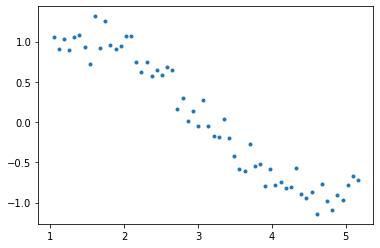

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(data[['x']],data[['y']],'.')


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True)
linreg.fit(data[['x']],data[['y']])

LinearRegression(normalize=True)

In [ ]:
y_pred = linreg.predict(data[['x']])

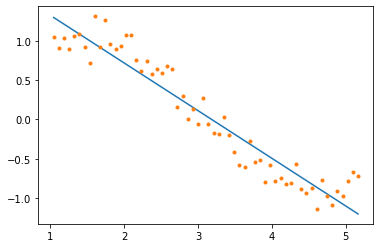

In [ ]:
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

In [ ]:
for i in range(2,50):
  colname = 'x_'+str(i)
  data[colname] = data['x']**i

data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49
0,1.047198,0.761216,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,...,6.326226,6.624809,6.937483,7.264916,7.607802,7.966871,8.342888,8.736652,9.149001,9.580811e+00
1,1.117011,0.971831,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,...,83.616823,93.400888,104.329793,116.537497,130.173634,145.405345,162.419329,181.424132,202.652701,2.263652e+02
2,1.186824,0.739816,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,...,945.042222,1121.598687,1331.140118,1579.828895,1874.978677,2225.269489,2641.002995,3134.405451,3719.987275,4.414970e+03
3,1.256637,0.877233,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,...,9298.107455,11684.346430,14682.982762,18451.180311,23186.437006,29136.936065,36614.553716,46011.205187,57819.385680,7.265798e+04
4,1.326450,0.846670,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,...,80842.250480,107233.221865,142239.531969,188673.660111,250266.220135,331965.685639,440335.960571,584083.736845,774758.007962,1.027678e+06


In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True)
linreg.fit(data[['x','x_2','x_3']],data[['y']])

LinearRegression(normalize=True)

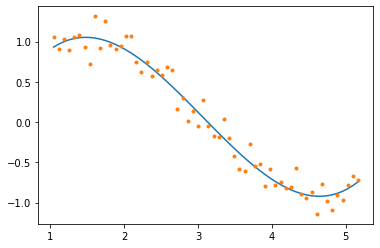

In [ ]:
y_pred = linreg.predict(data[['x','x_2','x_3']])
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

In [ ]:
predictors = ['x']
predictors.extend(['x_'+str(i) for i in range(2,50)])

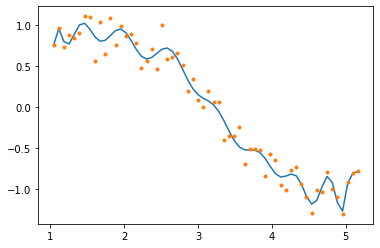

In [ ]:
from sklearn.linear_model import LinearRegression

predictors = ['x']
predictors.extend(['x_'+str(i) for i in range(2,50)])


linreg = LinearRegression(normalize=True)
linreg.fit(data[predictors],data[['y']])

y_pred = linreg.predict(data[predictors])
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

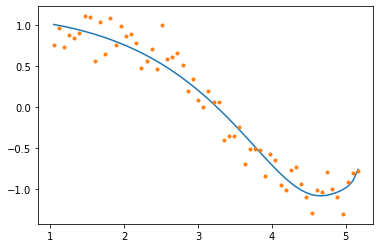

In [ ]:
from sklearn.linear_model import Ridge 

predictors = ['x']
predictors.extend(['x_'+str(i) for i in range(2,50)])


linreg = Ridge(alpha=1e-2,normalize=True)
linreg.fit(data[predictors],data[['y']])

y_pred = linreg.predict(data[predictors])
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.955e-01, tolerance: 3.620e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


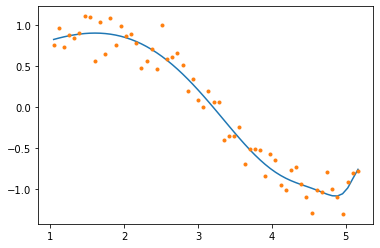

In [ ]:
# Least Absolute Shrinkage and selection Operator
from sklearn.linear_model import Lasso 

predictors = ['x']
predictors.extend(['x_'+str(i) for i in range(2,50)])


linreg = Lasso(alpha=1e-8,normalize=True,max_iter=1e5)
linreg.fit(data[predictors],data[['y']])

y_pred = linreg.predict(data[predictors])
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')